In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv
/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv


In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv')
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
df.columns=['TweetID','entity','sentiment','Tweet content']
df.head()

,TweetID,entity,sentiment,Tweet content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


**Exploratory Data Analysis**

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


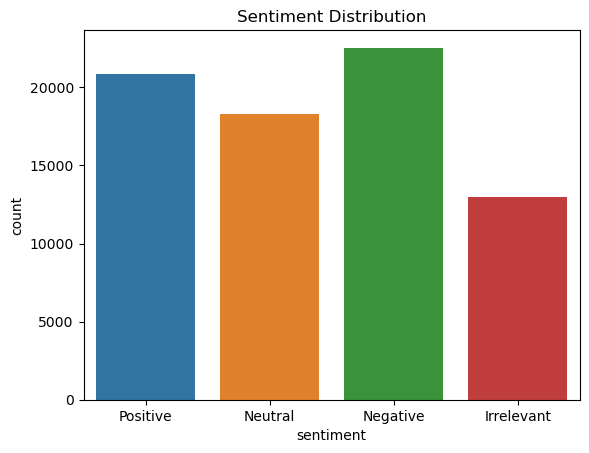

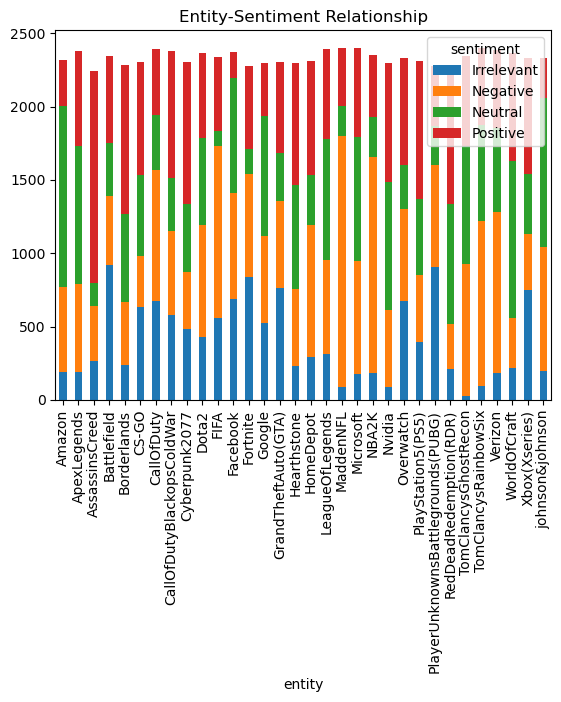

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment distribution
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

# Entity and sentiment relationship
entity_sentiment_counts = df.groupby(['entity', 'sentiment']).size().unstack()
entity_sentiment_counts.plot(kind='bar', stacked=True)
plt.title('Entity-Sentiment Relationship')
plt.show()

**Wordcloud for different Sentiment**

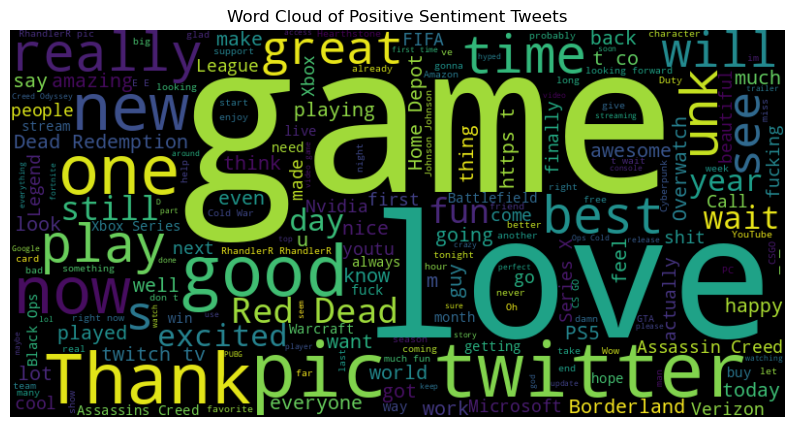

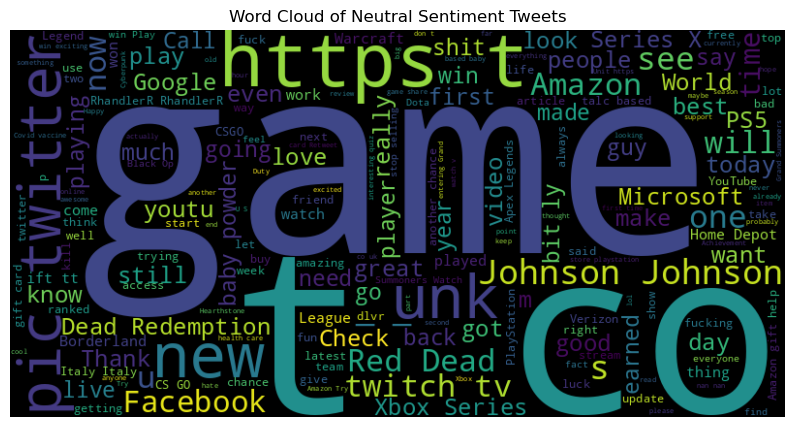

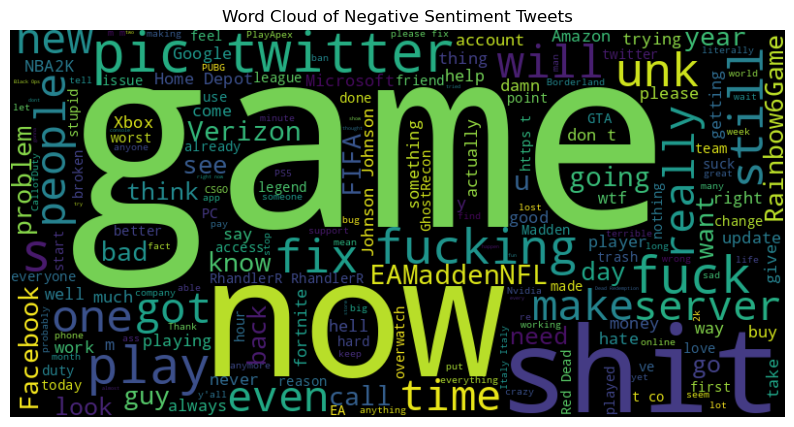

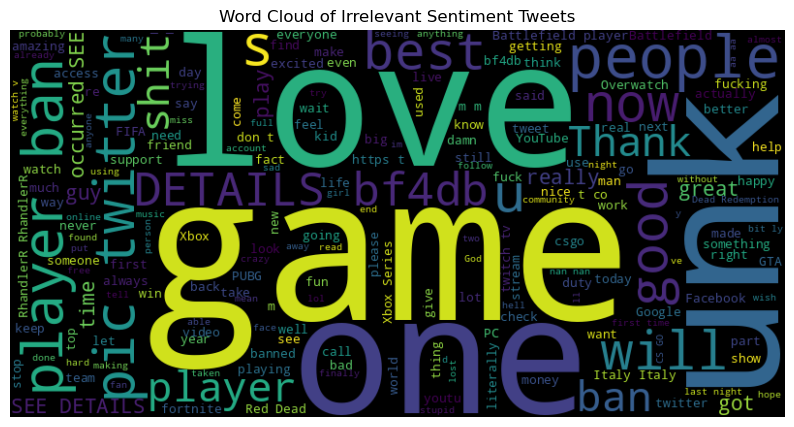

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(sentiment):
    # Filter tweets of the specified sentiment and extract the 'Tweet content' column
    tweets = df[df["sentiment"] == sentiment]["Tweet content"]
    
    # Convert the tweets to strings
    tweets = tweets.astype(str)
    
    # Join all the tweets into a single string
    text = ' '.join(tweets)
    
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400).generate(text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of {sentiment} Sentiment Tweets')
    plt.show()

# Iterate over the unique sentiments in the DataFrame
sentiments = df['sentiment'].unique()
for sentiment in sentiments:
    generate_wordcloud(sentiment)

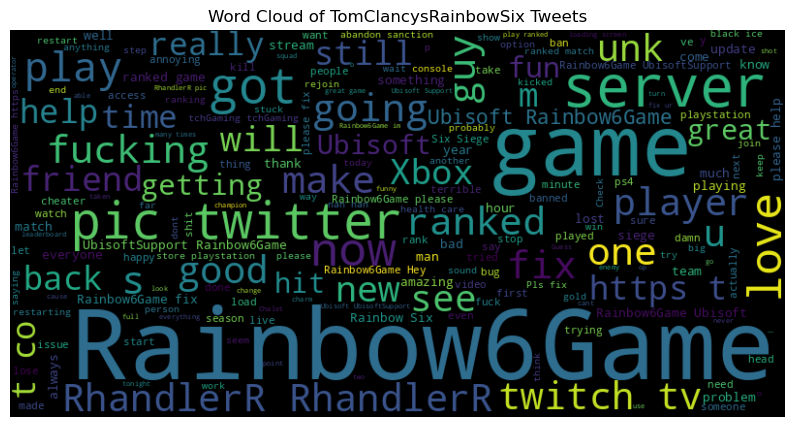

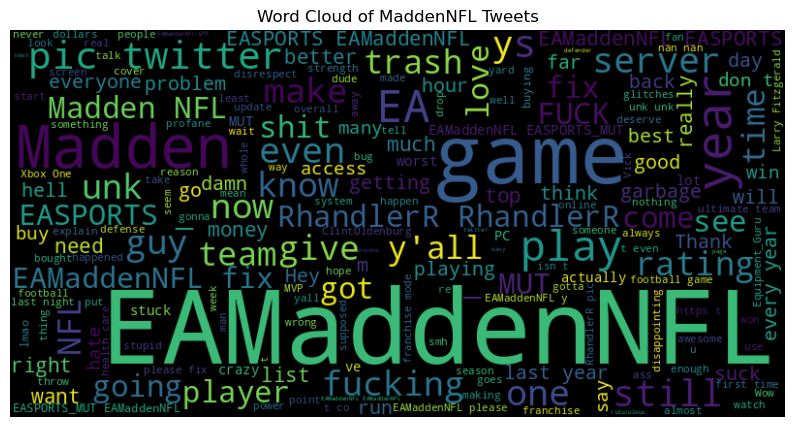

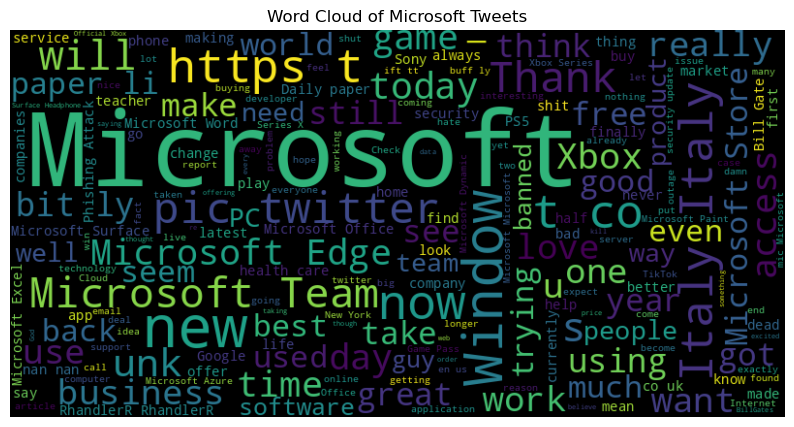

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Calculate the counts of each entity
entity_counts = df['entity'].value_counts()

# Select the top three entities with the highest counts
top_entities = entity_counts.head(3).index.tolist()

# Iterate over the top entities and generate word clouds
for entity in top_entities:
    # Filter tweets associated with the current entity and extract the 'Tweet content' column
    tweets = df[df['entity'] == entity]['Tweet content']
    
    # Convert the tweets to strings
    tweets = tweets.astype(str)
    
    # Join all the tweets into a single string
    text = ' '.join(tweets)
    
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400).generate(text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of {entity} Tweets')
    plt.show()